# Context

In [ ]:
def initialization():
    import pandas as pd
    import numpy as np
    pd.plotting.register_matplotlib_converters
    import seaborn as sns
    import matplotlib.pyplot as plt
    from matplotlib import style
    style.use('ggplot')
    %matplotlib inline
    titanic = pd.read_csv('train.csv')
    titanic_cleaned = titanic.dropna()
    surv = titanic[titanic.Survived == 1]
    data.dropna().head(15)
    titanic = pd.read_csv('train.csv')
    titanic_cleaned = titanic.dropna()
    sns.set(style='darkgrid', font_scale=2)

# Data quality assessment

In [334]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


# Data exploration

In [ ]:
def heatmap_correlation():
    data = titanic.drop(['PassengerId'], axis=1)

    genders = {"male": 0, "female": 1}
    embarked = {"C":0, "Q":1, "S":2}

    data['Sex'] = data['Sex'].map(genders)
    data['Embarked'] = data['Embarked'].map(embarked)
    sns.heatmap(data.corr(), fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

    plt.show()

In [332]:
def survived_by_age():
    age_surv_all = titanic[['Survived','Age']].dropna()
    age_distribution = age_surv_all.groupby('Age').count().reset_index()

    age_surv = age_surv_all[age_surv_all.Survived == 1]

    age_surv_distribution = age_surv.groupby('Age').count().reset_index()

    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)
    plt.rc('axes', labelsize=14)
    sns.set_style('white')

    sns.histplot(data=titanic, x='Age', hue='Pclass', multiple='stack'\
                 , palette=['red','orange','yellow'], bins=20)
    sns.histplot(data=surv, x='Age', hue='Pclass', multiple='stack'\
                 , palette=['#373','#595','#7B7'], bins=20)

    plt.xlabel('')
    plt.tight_layout();

    age_surv_percentage = age_surv['Survived']/age_distribution['Survived']
    plt.figure(2, figsize=(15,10));

    df=pd.DataFrame({'Age': age_distribution['Age'] , 'Survived': age_surv_percentage})

    df['decade'] = [age//10*10 for age in df.Age]
    g = sns.relplot(x='decade', y='Survived',
                data=df,
                kind='line',
                ci=None
               )

    g.set_xlabels('Passenger Age Group')
    g.set_ylabels("Percent Survived");

In [289]:
def survived_by_cabin():
    titanic['Survived'].corr(titanic['Fare'])
    t = titanic[['Cabin','Survived']].groupby('Cabin').count()

    t = t.reset_index()
    t.rename(columns={'Cabin':'Cabin','Survived':'Qty'}, inplace=True)
    t = t.merge(titanic[['Survived','Cabin']], on='Cabin')
    c = t[t.Survived==1].groupby('Qty').count()
    d = t.groupby('Qty').count()
    e = c['Survived']/d['Survived']

    plt.figure(2);
    g = sns.relplot(data=e, kind='line');
    g.set_xlabels('Qty of passengers at one cabin')
    g.set_ylabels('Percentage of survived')

In [301]:
def correlation_by_sex():
    surv = titanic[titanic.Survived == 1]
    sex = titanic[['Survived','Sex']]
    male = len(sex[(sex.Sex=='male')&(sex.Survived==1)])/len(sex[sex.Sex=='male'])
    female = len(sex[(sex.Sex=='female')&(sex.Survived==1)])/len(sex[sex.Sex=='female'])
    print(f"Male survived to all males ratio {male}. Female survived to all ratio {female}")

    sex['Sex'].str.get_dummies().corrwith(sex['Survived']/sex['Survived'].max())

In [352]:
def survived_by_fare():
#     sns.set(style='darkgrid', font_scale=2)  

#     g = sns.relplot(x='Age', y='Fare', data=titanic,
#                 row='Pclass',
#                 hue='Survived',
#                 aspect=1.5,
#                     kind='line',
#                     palette=['black', 'red']
#                );
#     g.set_titles(row_template="{row_name} Pclass")
#     g.set_xlabels('Passenger Age')
#     g.set_ylabels('Fare')
#     leg = g._legend
#     leg.set_title('Survived by Fare');
    plt.figure(figsize=(50,15))
    titanic.boxplot(column='Fare', by='Survived', showfliers=False, showmeans=True)

In [307]:
def parents_children_survival():
    t = titanic[['Parch','Survived']].groupby('Parch').count()
    t = t.reset_index()
    t.rename(columns={'Parch':'Parch','Survived':'Qty'}, inplace=True)
    a = titanic[['Parch','Survived']][titanic.Survived==1].groupby('Parch').count()
    e = a['Survived']/t['Qty']

    plt.figure(2);
    g = sns.relplot(data=e, kind='line');
    g.set_xlabels('Qty of parents/children')
    g.set_ylabels('Percentage of survived')

In [309]:
def siblings_spouses_survival():
    t = titanic[['SibSp','Survived']].groupby('SibSp').count()
    t = t.reset_index()
    t.rename(columns={'SibSp':'SibSp','Survived':'Qty'}, inplace=True)
    a = titanic[['SibSp','Survived']][titanic.Survived==1].groupby('SibSp').count()
    e = a['Survived']/t['Qty']

    plt.figure(2);
    g = sns.relplot(data=e, kind='line');
    g.set_xlabels('Qty of siblings/spouses')
    g.set_ylabels('Percentage of survived')

In [311]:
def embarked_survival():
    t = titanic[['Embarked','Survived']].groupby('Embarked').count()
    t = t.reset_index()
    t.rename(columns={'Embarked':'Embarked','Survived':'Qty'}, inplace=True)
    a = titanic[['Embarked','Survived']][titanic.Survived==1].groupby('Embarked').count()
    a = a.reset_index()
    e = a['Survived']/t['Qty']

    plt.figure(2);
    g = sns.relplot(data=e, kind='line');
    g.set_xlabels('Ports to get on board')
    g.set_ylabels('Percentage of survived')

# Summary

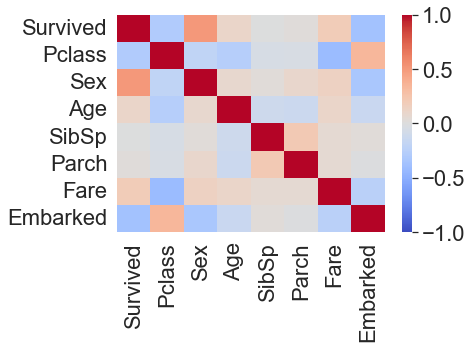

In [306]:
initialization()
heatmap_correlation()

It's shown that there is a direct correlation between Survival and Sex, Fare factors.

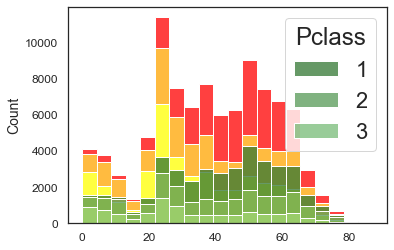

<Figure size 1080x720 with 0 Axes>

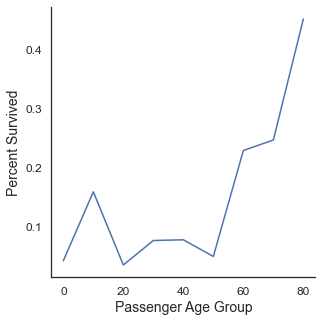

In [333]:
survived_by_age()

<Figure size 432x288 with 0 Axes>

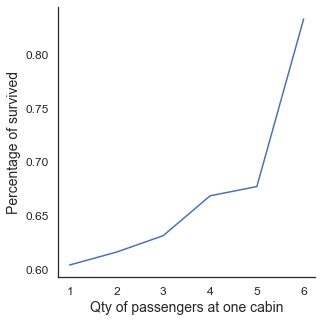

In [291]:
survived_by_cabin();

Quantity of passengers living at one cabin is positively correlated with probability of surviving. The dependency is not linear but rather exponential. The number of 6 persons at one cabin gives much more chances to survive than 5 (84 percents to 67).

In [303]:
correlation_by_sex()

Male survived to all males ratio 0.20579534519014864. Female survived to all ratio 0.7115253155903933


The sex of person is one of most important features for survival. The highest probability is for females.

<Figure size 3600x1080 with 0 Axes>

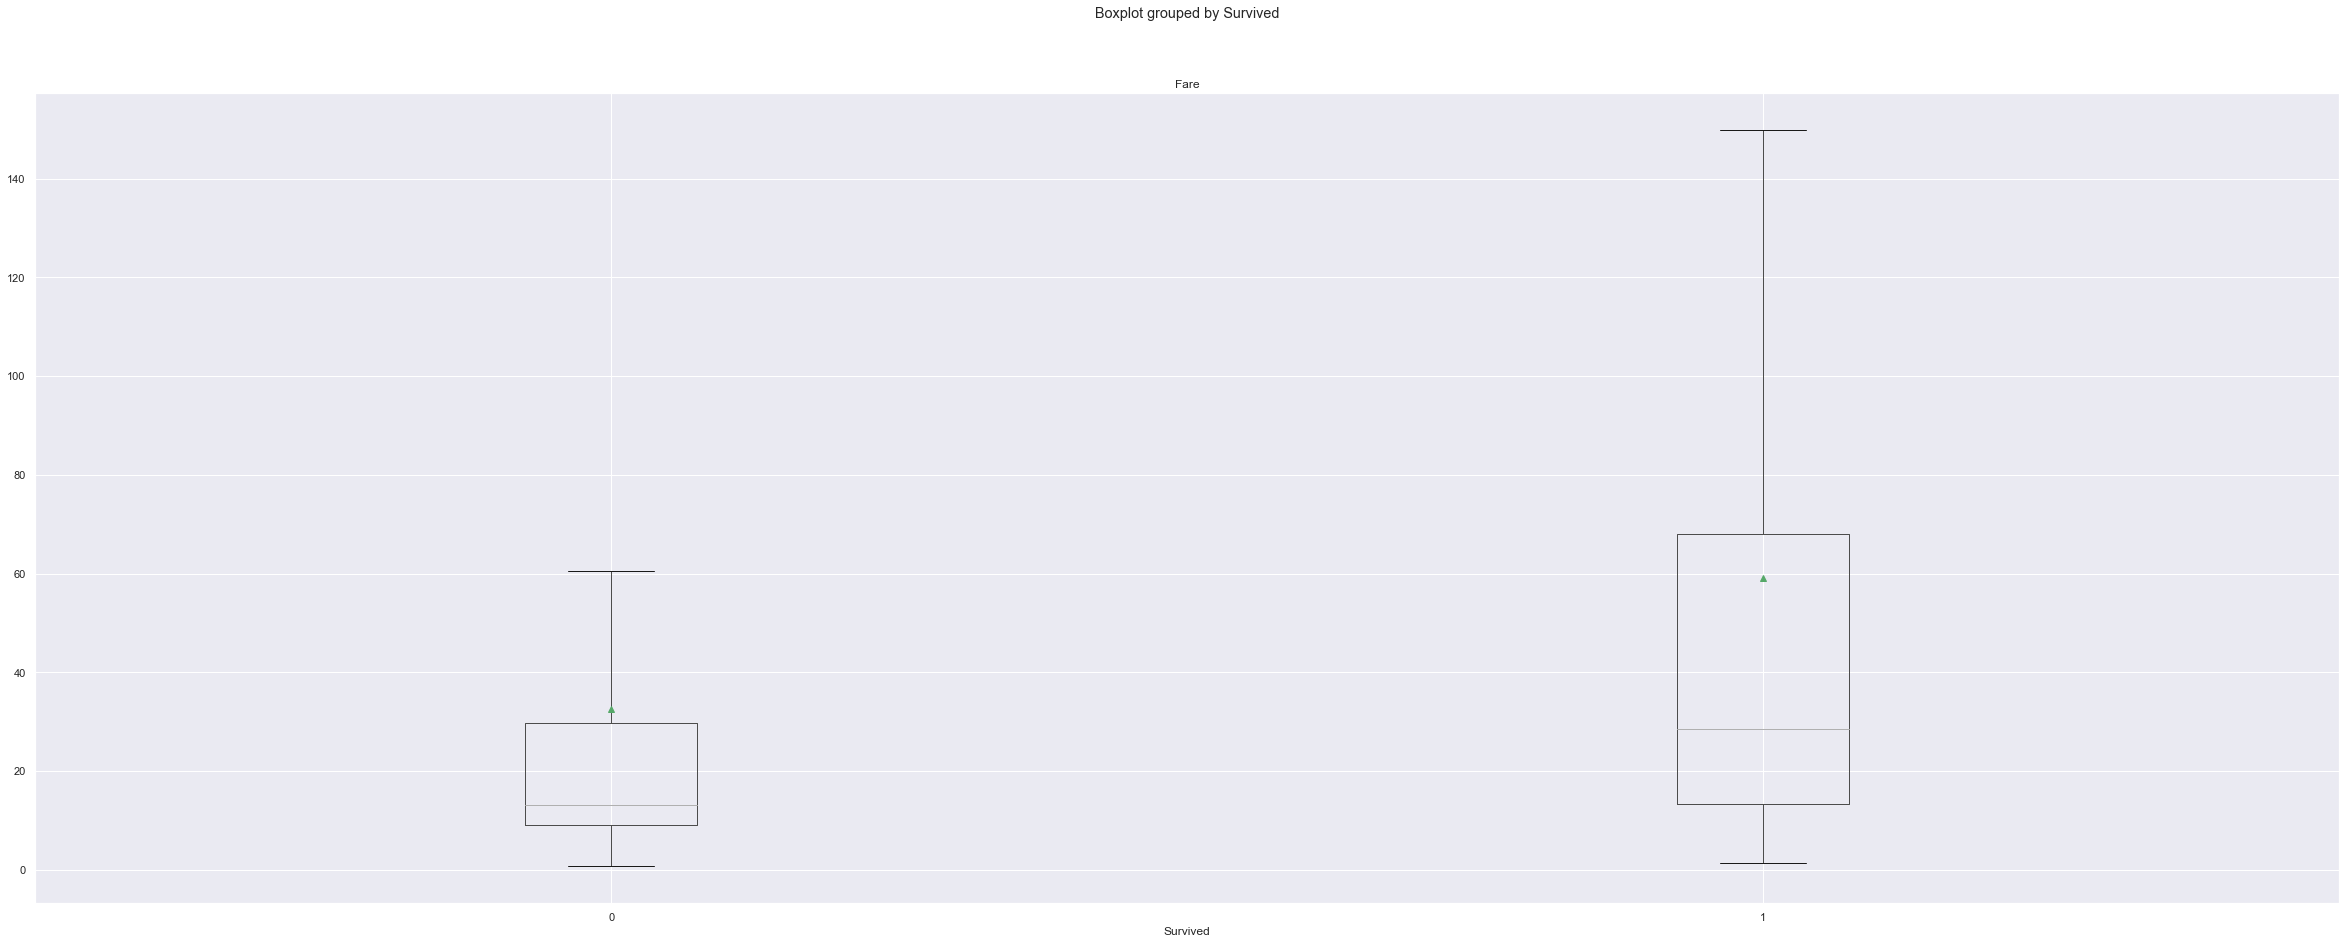

In [353]:
survived_by_fare()

It is shown that the ones who didn't survive have much more dense fare at the region of small ones. And the ones who survived have higher fares.

<Figure size 2880x1080 with 0 Axes>

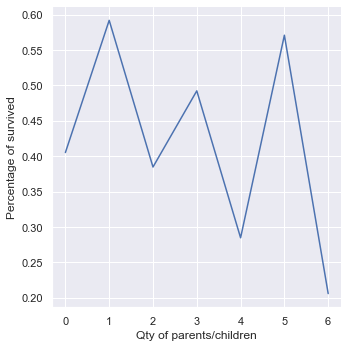

In [349]:
parents_children_survival();

There is a highest probability of survival for one parent or child. The second almost the same highest probability is for family of 5 chidren.

<Figure size 432x288 with 0 Axes>

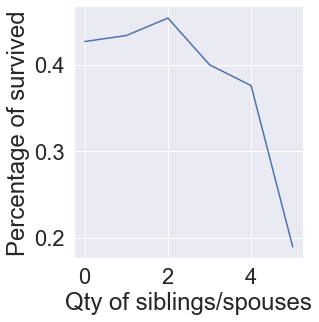

In [310]:
siblings_spouses_survival();

It appears that the highest probability to survive corresponds to 2 siblings or spouses. Second place is for 1 sib/sp, third is for 3.

<Figure size 432x288 with 0 Axes>

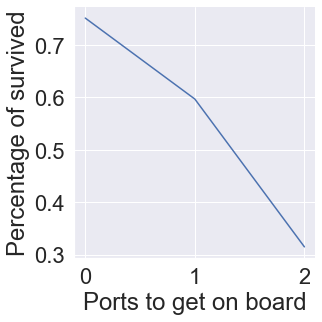

In [312]:
embarked_survival();

This feature of Embarkment port is correlated with Fare. It's seen from heatmap - there is positive correlation. So there is no direct causation out of embarkment port.